## Vaccination Data by County, NJ

In [259]:
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import pyplot as plt
from config import v_key
from config import p_key

In [260]:
d_state_covid = pd.read_csv("Data/NJ state time series.csv" )
#d_state_covid.head()
len(d_state_covid)

11319

In [261]:
#getting columns needed for vaccination data, cleaning data
d_state_covid['county'] = d_state_covid['county'].str[:-7]
d_state_covid_conv_df=d_state_covid[['date','county','fips','actuals.cases','actuals.deaths','actuals.newCases',
         'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
         'actuals.vaccinesAdministered','actuals.newDeaths']]
clean_vaccine_df =d_state_covid_conv_df.dropna(subset=['actuals.cases','actuals.deaths','actuals.newCases',
                                                    'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
                                                    'actuals.vaccinesAdministered','actuals.newDeaths'])



#clean_vaccine_df.dtypes
#len(clean_vaccine_df)

## Population Data by County, NJ

In [262]:
# getting population data from Census API (the same API  as in Age vs Cases analysis used)

pop_url = "https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&for=county:*&in=state:34&key=" + p_key 
pop_response = requests.get(pop_url)

pop_data = pop_response.json()
pop_df = pd.DataFrame((pop_data), columns=("County","Total Population","State_Num","County_Num"))
pop_df = pop_df.drop(0).reset_index(drop=True)

pop_df["fips"] = pop_df["State_Num"] + pop_df["County_Num"]
population_df = pop_df.drop(columns = ['County','County_Num','State_Num'])
population_df["Total Population"] = population_df["Total Population"].astype(float)
population_df["fips"] =population_df["fips"].astype(int)



In [263]:
# merging vaccination data with population data
vaccines_mer_pd = clean_vaccine_df.merge(population_df, how ="left", on ="fips")
vaccines_mer_pd.head()

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population
0,2021-02-18,Atlantic,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0,263670.0
1,2021-02-19,Atlantic,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0,263670.0
2,2021-02-20,Atlantic,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0,263670.0
3,2021-02-21,Atlantic,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0,263670.0
4,2021-02-22,Atlantic,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0,263670.0


## Vaccination % Population By County, NJ 

In [264]:
percent_counties_vaccine = pd.DataFrame(vaccines_mer_pd[["date","fips","county"]])

percent_counties_vaccine["Percentage completed"]= vaccines_mer_pd["actuals.vaccinationsCompleted"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percentage initiated"]= vaccines_mer_pd["actuals.vaccinationsInitiated"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percentage of Cases/Total Population"] =vaccines_mer_pd['actuals.cases']/vaccines_mer_pd["Total Population"]*100 
percent_vaccine_round= percent_counties_vaccine.round(decimals=2)
percent_vaccine_round.head()


,date,fips,county,Percentage completed,Percentage initiated,Percentage of Cases/Total Population
0,2021-02-18,34001,Atlantic,5.35,13.32,9.04
1,2021-02-19,34001,Atlantic,5.58,13.40,9.07
2,2021-02-20,34001,Atlantic,5.69,13.42,9.12
3,2021-02-21,34001,Atlantic,6.03,13.72,9.15
4,2021-02-22,34001,Atlantic,6.29,13.79,9.18


In [265]:
#used only for presentation
# plot scatter comparing percentage in Vaccination Completed vs Cases in % 
#import random

#plt.figure(figsize=(17,10)) 
#plt.ylabel("Percentage of Cases/Total Population")
#plt.xlabel("Percentage Vaccination completed/Total Population ")
#plt.title("Vaccination Completed vs Cases % of Population by County NJ", fontsize=14)
#for co in percent_vaccine['county'].sort_values().unique():
 #   pct_vaccine_co = percent_vaccine_round.loc[percent_vaccine_round["county"]==co]
  #  random_color="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
   # plt.scatter(pct_vaccine_co["Percentage completed"],pct_vaccine_co["Percentage of Cases/Total Population"],
   #             c=random_color, label=co, s=13)
#plt.legend() 
#plt.savefig("../Images/Vaccination_vs_Cases_in_pct_NJ.png")

#plt.show()

In [266]:
#Date - Jun 2021 when data from all counties are available
Data_date = "2021-06-26"
percent_vaccine = percent_counties_vaccine.loc[percent_counties_vaccine["date"]==Data_date].sort_values(by=['Percentage completed'], ascending =False)
percent_vaccine_round= percent_vaccine.round(decimals=2)
percent_vaccine_round



,date,fips,county,Percentage completed,Percentage initiated,Percentage of Cases/Total Population
1902,2021-06-26,34027,Morris,61.02,67.34,10.24
2456,2021-06-26,34035,Somerset,60.29,67.87,9.19
669,2021-06-26,34009,Cape May,56.17,61.01,10.09
263,2021-06-26,34003,Bergen,55.75,61.82,11.25
1627,2021-06-26,34023,Middlesex,54.32,61.95,11.23
1348,2021-06-26,34019,Hunterdon,53.79,61.39,7.94
1486,2021-06-26,34021,Mercer,53.14,61.42,9.30
392,2021-06-26,34005,Burlington,53.06,57.84,9.96
1764,2021-06-26,34025,Monmouth,52.98,59.00,12.28
533,2021-06-26,34007,Camden,50.90,56.66,11.04


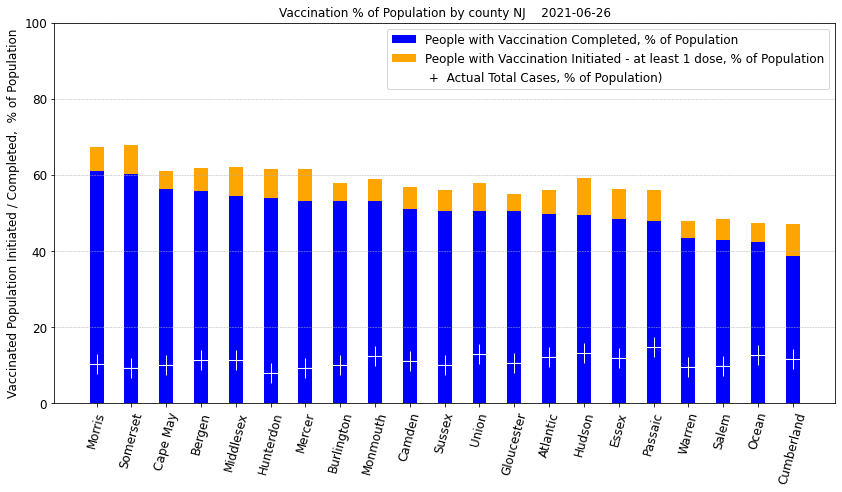

In [268]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
header = ['People with Vaccination Completed, % of Population','People with Vaccination Initiated - at least 1 dose, % of Population',
           ' +  Actual Total Cases, % of Population)']
dataset = [percent_vaccine["Percentage completed"],percent_vaccine["Percentage initiated"]]
X_AXIS = percent_vaccine_round["county"]
Y_AXIS = percent_vaccine_round["Percentage of Cases/Total Population"]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.0, 7.0)

configs = dataset[0]
N = len(configs)
ind = np.arange(N)
width = 0.4
 
p1 = plt.bar(ind, dataset[0], width, color='blue')
p2 = plt.bar(ind, np.array(dataset[1])-np.array(dataset[0]), width, bottom=dataset[0], color='orange')
p =  plt.plot(X_AXIS,Y_AXIS, color = "white", marker = '+', ms= 20, mfc = "r", linewidth = 0.1) 

plt.ylim([0,100])
plt.yticks(fontsize=12)
plt.ylabel("Vaccinated Population Initiated / Completed,  % of Population", fontsize=12)
plt.xticks(ind, X_AXIS, fontsize=12, rotation=75)
plt.title("Vaccination % of Population by county NJ    "  +  (Data_date))
plt.legend((p1[0], p2[0], p[0]), (header[0], header[1], header[2]), fontsize=12)
plt.grid(axis = "y", linestyle = "--", linewidth = 0.5)
plt.savefig("../Images/Vaccination_counties_NJ_Jun2021.png")

plt.show()


## Vaccination - Daily Cases, February 2021 - July 2021, by County NJ
* time frame was adjusted to data, as when available for all counties in NJ 

In [331]:
#adding daily number of vaccination_initiated cases and vaccination_completed cases, dropping columns,cleaning data, creating DataFrame 
time_vaccine_df = pd.DataFrame(vaccines_mer_pd)
time_vaccine_df.head()
time_vaccine_df =time_vaccine_df.sort_values(['county', 'date'])
time_vaccine_df["delta_init"]=time_vaccine_df['actuals.vaccinationsInitiated'].diff()
time_vaccine_df["delta_complete"]=time_vaccine_df['actuals.vaccinationsCompleted'].diff()
index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"]).fillna(0) 
index_county_df.loc[index_county_df['delta_init'] <0,['delta_init']]=0
index_county_df.loc[index_county_df['delta_complete'] <0,['delta_complete']]=0
n_county_vaccine_df = index_county_df.drop(columns = ['actuals.vaccinesAdministered'])


In [332]:
nc_vaccine_df = n_county_vaccine_df.rename(columns={'county':'County','date':'Date','fips':'Fips','actuals.vaccinationsInitiated':'Vaccination Initiated','actuals.vaccinationsCompleted':'Vaccination Completed',
                               'delta_init':'Vaccination Iniciated by Day','delta_complete': 'Vaccination Completed by day','actuals.cases':'Total New Cases','actuals.newCases':'Daily Cases', 
                               'Total Population':'Total Population', 'actuals.deaths': 'Total Death','actuals.newDeaths':'Death Daily Cases'})
order_nc_vaccine_df=nc_vaccine_df[['Date','County','Total Population','Total New Cases','Vaccination Initiated','Vaccination Completed', 'Daily Cases','Death Daily Cases','Vaccination Iniciated by Day','Vaccination Completed by day']]
order_nc_vaccine_df.head()


,Date,County,Total Population,Total New Cases,Vaccination Initiated,Vaccination Completed,Daily Cases,Death Daily Cases,Vaccination Iniciated by Day,Vaccination Completed by day
county,,,,,,,,,,
Atlantic,2021-02-18,Atlantic,263670.0,23833.0,35117.0,14104.0,153.0,10.0,0.0,0.0
Atlantic,2021-02-19,Atlantic,263670.0,23909.0,35322.0,14712.0,76.0,3.0,205.0,608.0
Atlantic,2021-02-20,Atlantic,263670.0,24048.0,35390.0,15004.0,139.0,2.0,68.0,292.0
Atlantic,2021-02-21,Atlantic,263670.0,24131.0,36181.0,15890.0,83.0,0.0,791.0,886.0
Atlantic,2021-02-22,Atlantic,263670.0,24207.0,36371.0,16576.0,76.0,1.0,190.0,686.0


In [333]:
#index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"])
county_x= order_nc_vaccine_df.loc[nc_vaccine_df ['County'] == "Morris"]


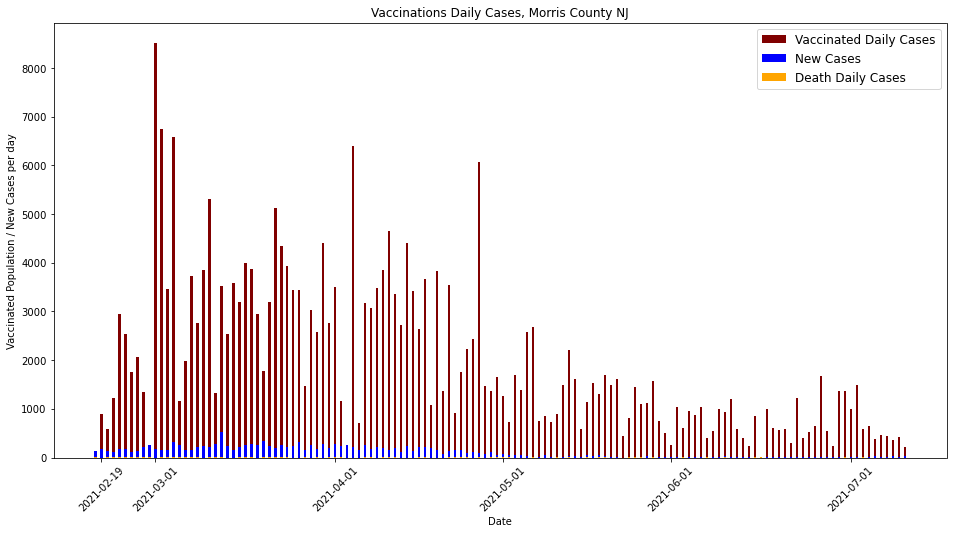

In [334]:
x_axis = county_x["Date"]
values = county_x['Vaccination Iniciated by Day']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
p1_M = plt.bar(x_axis, values, color ='maroon', width = 0.4)
p2_M = plt.bar(x_axis, county_x['Daily Cases'], color ='blue', width = 0.4)
p3_M = plt.bar(x_axis, county_x['Death Daily Cases'], color ='orange', width = 0.4)

#plt.ylim(0,5000)  
plt.xlabel("Date")
plt.ylabel("Vaccinated Population / New Cases per day")
plt.xticks(['2021-02-19','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=45)
plt.title("Vaccinations Daily Cases, Morris County NJ")
plt.legend((p1_M[0], p2_M[0], p3_M[0]), ('Vaccinated Daily Cases', 'New Cases', 'Death Daily Cases'), fontsize=12)

plt.savefig("../Images/Vaccinaction_Morris.png")

plt.show()

In [335]:
county_y=order_nc_vaccine_df .loc[nc_vaccine_df ['County'] == "Cumberland"]


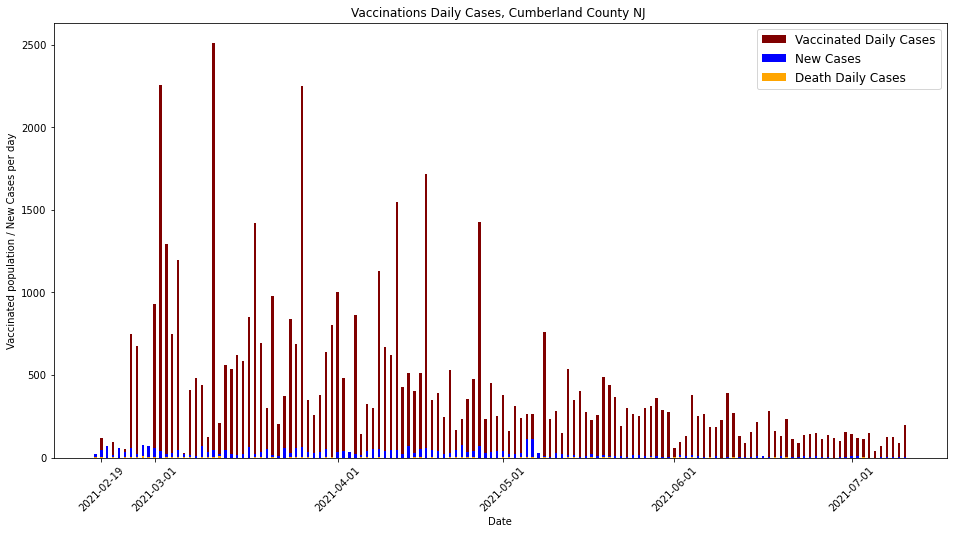

In [336]:
x_axis = county_y["Date"]
values = county_y['Vaccination Iniciated by Day']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
p1_C = plt.bar(x_axis, values, color ='maroon', width = 0.4)
p2_C = plt.bar(x_axis, county_y['Daily Cases'], color ='blue', width = 0.4)
p3_C = plt.bar(x_axis, county_y['Death Daily Cases'], color ='orange', width = 0.4)

#plt.ylim(0,2000)
plt.xlabel("Date")
plt.ylabel("Vaccinated population / New Cases per day")
plt.xticks(['2021-02-19','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=45)
plt.title("Vaccinations Daily Cases, Cumberland County NJ ")
plt.legend((p1_C[0], p2_C[0],p3_C[0]), ('Vaccinated Daily Cases', 'New Cases','Death Daily Cases'), fontsize=12)


plt.savefig("../Images/Vaccinaction_Cumberland.png")

plt.show()

### Regression (Vaccinations vs Cases) 

 Total number of vaccinated people vs total number of cases was plotted, however the linear correlation cannot be used in this case. There is a relationship where a different function should be used.

In [337]:
# Morris completed
#plot: setting x_values, y_values 
x_values = county_x["Vaccination Completed"]
y_values =  county_x["Total New Cases"]


In [338]:
# Morris completed
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = 0.05x +37635.89


The r-squared is: 0.8685399101540593


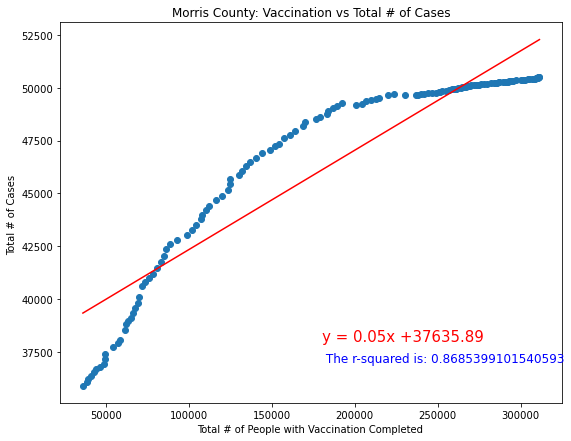

In [339]:
#Morris completed
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_x["Vaccination Completed"]
y_values =  county_x["Total New Cases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Morris County: Vaccination vs Total # of Cases")
plt.ylabel("Total # of Cases ")
plt.xlabel("Total # of People with Vaccination Completed ")

plt.annotate(line_eq,(180000,38000),fontsize=15,color="red")
plt.text(180000,37000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear_regr_Vaccinaction_Morris.png")

plt.show()

In [340]:
# Cumberland completed
#plot: setting x_values, y_values 
x_values = county_y["Vaccination Completed"]
y_values =  county_y["Total New Cases"]


In [341]:
# Cumberland completed
# Performed a linear regression on Vaccination vs New Cases
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = 0.06x +13905.09


The r-squared is: 0.9791295763553679


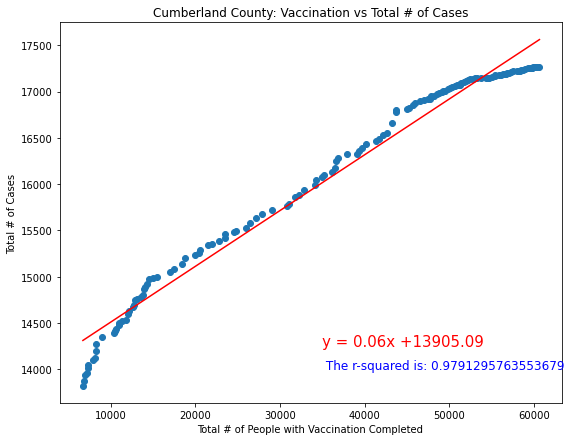

In [342]:
# Cumberland completed
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_y["Vaccination Completed"]
y_values =  county_y["Total New Cases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Cumberland County: Vaccination vs Total # of Cases")
plt.ylabel("Total # of Cases")
plt.xlabel("Total # of People with Vaccination Completed ")

plt.annotate(line_eq,(35000,14250),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.text(35000,14000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
plt.savefig("../Images/Linear_regr_Vaccinaction_Cumberland.png")

plt.show()

The correction was made to plot linear regression, however the vaccination total vs total number of daily cases is in different relationship, and linear regression cannot be used to showcase the correlation/relationshp between these variables.

In [343]:
#Correction:
# Morris completed :Vaccination vs Daily Cases
#plot: setting x_values, y_values 
x_values = county_x["Vaccination Completed"]
y_values =  county_x["Daily Cases"]


In [344]:
# Morris completed
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = -0.0x +297.61


The r-squared is: 0.7298153828262036


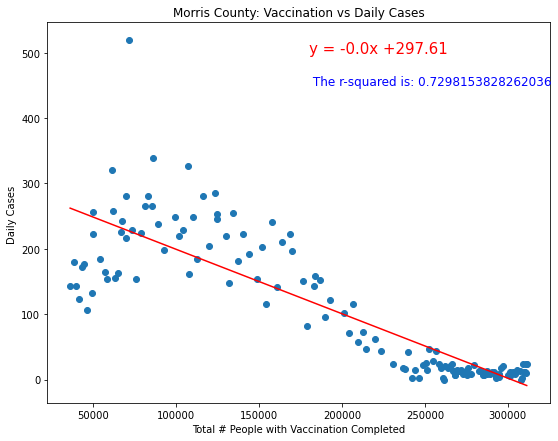

In [345]:

plt.figure(figsize=(9,7))
x_values = county_x["Vaccination Completed"]
y_values =  county_x["Daily Cases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Morris County: Vaccination vs Daily Cases")
plt.ylabel("Daily Cases ")
plt.xlabel("Total # People with Vaccination Completed")

plt.annotate(line_eq,(180000,500),fontsize=15,color="red")
plt.text(180000,450, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear_regr_Vaccinaction_Morris_Daily_Cases.png")

plt.show()

In [346]:
# Cumberland Corrected: Vaccination vs Daily Cases
#plot: setting x_values, y_values 
x_values = county_y["Vaccination Completed"]
y_values =  county_y["Daily Cases"]


In [347]:
# Cumberland completed
# Performed a linear regression on Vaccination vs New Cases
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = -0.0x +51.72


The r-squared is: 0.32370026689130854


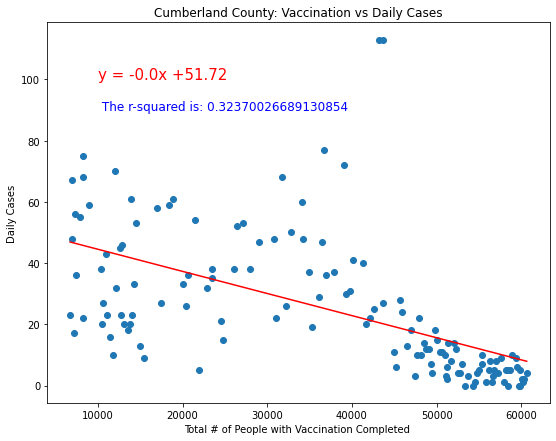

In [348]:
# Cumberland completed
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_y["Vaccination Completed"]
y_values =  county_y["Daily Cases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Cumberland County: Vaccination vs Daily Cases")
plt.ylabel("Daily Cases")
plt.xlabel("Total # of People with Vaccination Completed ")

plt.annotate(line_eq,(10000,100),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.text(10000,90, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
plt.savefig("../Images/Linear_regr_Vaccinaction_Cumberland_Daily_Cases.png")

plt.show()

In [257]:
#Pearson's correlation coefficient Morris County - between people fully vaccinated (vacc. completed) vs daily cases
import scipy.stats as st

vacc_compl = county_x.iloc[:,6]
cases_daily = county_x.iloc[:,7]
print(f"The correlation coefficient between vaccination completed  and the total number of cases is {round(st.pearsonr(vacc_compl,cases_daily)[0],2)}")

The correlation coefficient between vaccination completed  and the total number of cases is 0.4


In [258]:
#Pearson's correlation coefficient - between people vaccinated with 1-dose (vacc.initiated) vs daily cases
import scipy.stats as st

vacc_init = county_x.iloc[:,5]
cases_daily1 = county_x.iloc[:,7]
print(f"The correlation coefficient between vaccination initiated  and the total number of cases is {round(st.pearsonr(vacc_init ,cases_daily1)[0],2)}")

The correlation coefficient between vaccination initiated  and the total number of cases is -0.45


In [225]:
#Pearson's correlation coefficient - between people vaccinated with 1-dose (vacc.initiated) vs daily cases
import scipy.stats as st

vacc_init = county_y.iloc[:,5]
cases_daily1 = county_y.iloc[:,6]
print(f"The correlation coefficient between vaccination initiated  and Daily Cases is {round(st.pearsonr(vacc_init ,cases_daily1)[0],2)}")

The correlation coefficient between vaccination initiated  and Daily Cases is -0.57


In [309]:
#Pearson's correlation coefficient Cumberland- between people fully vaccinated (vacc. completed) vs daily cases
import scipy.stats as st

vacc_compl = county_y.iloc[:,5]
cases_daily = county_y.iloc[:,7]
print(f"The correlation coefficient between vaccination completed  and daily cases is {round(st.pearsonr(vacc_compl,cases_daily)[0],2)}")

The correlation coefficient between vaccination completed  and daily cases is -0.42


## Regression by County, NJ (all counties)
    

In [349]:
# counties in NJ for linear regression calculation 
county_list =percent_vaccine['county'].unique()


Atlantic
The r-squared is: 0.7440676628709001
Bergen
The r-squared is: 0.7756166122670808
Burlington
The r-squared is: 0.6966132034477633
Camden
The r-squared is: 0.5417082886009167
Cape May
The r-squared is: 0.6803880969311464
Cumberland
The r-squared is: 0.32370026689130854
Essex
The r-squared is: 0.6902541323439831
Gloucester
The r-squared is: 0.5437815498884333
Hudson
The r-squared is: 0.7896387033107611
Hunterdon
The r-squared is: 0.6252240184857564
Mercer
The r-squared is: 0.7278626032803074
Middlesex
The r-squared is: 0.731116845486758
Monmouth
The r-squared is: 0.7834776280855381
Morris
The r-squared is: 0.7298153828262036
Ocean
The r-squared is: 0.8213469355916172
Passaic
The r-squared is: 0.6229251487640319
Salem
The r-squared is: 0.23601498282858457
Somerset
The r-squared is: 0.7472622465050549
Sussex
The r-squared is: 0.5421363726424014
Union
The r-squared is: 0.7567202898949013
Warren
The r-squared is: 0.6422756105787173


C:\Users\dasa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


,County,R-squared,Line Equation
0,Atlantic,[0.7440676628709001],[y = -0.0x +151.72]
1,Bergen,[0.7756166122670808],[y = -0.0x +553.44]
2,Burlington,[0.6966132034477633],[y = -0.0x +191.74]
3,Camden,[0.5417082886009167],[y = -0.0x +206.24]
4,Cape May,[0.6803880969311464],[y = -0.0x +46.27]
5,Cumberland,[0.32370026689130854],[y = -0.0x +51.72]
6,Essex,[0.6902541323439831],[y = -0.0x +463.56]
7,Gloucester,[0.5437815498884333],[y = -0.0x +123.23]
8,Hudson,[0.7896387033107611],[y = -0.0x +387.62]
9,Hunterdon,[0.6252240184857564],[y = -0.0x +55.85]


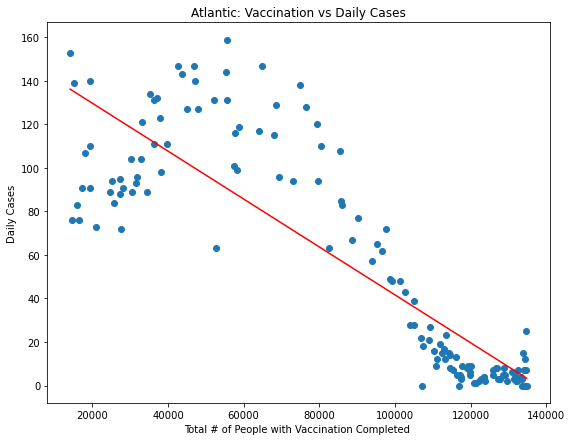

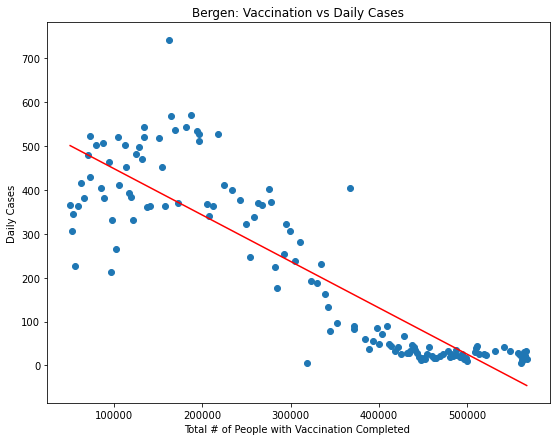

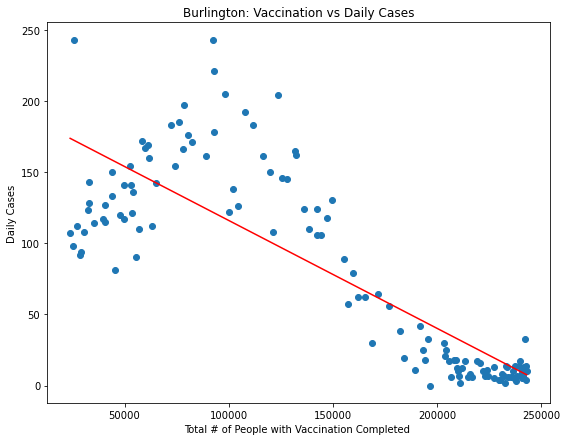

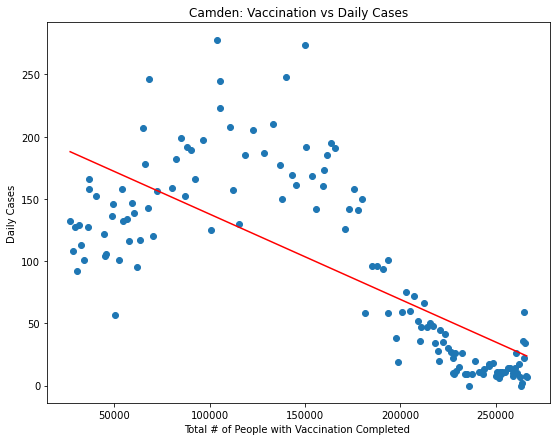

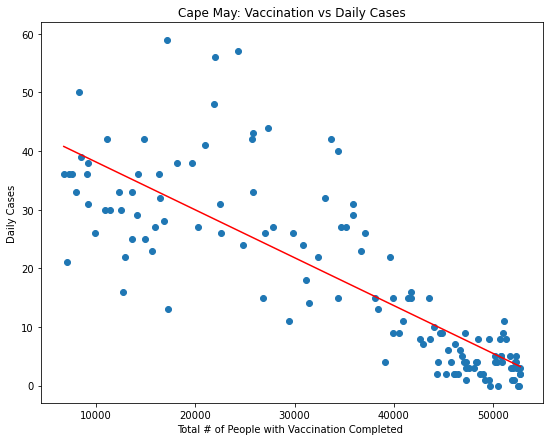

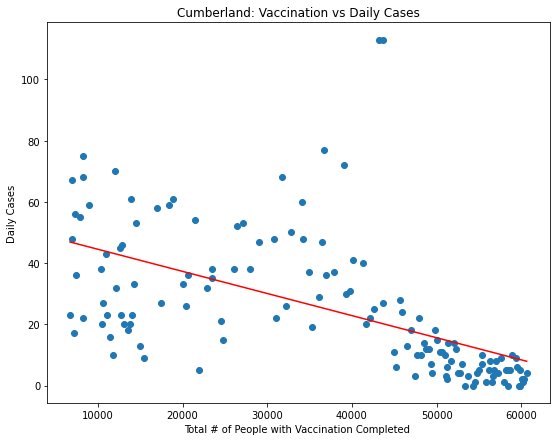

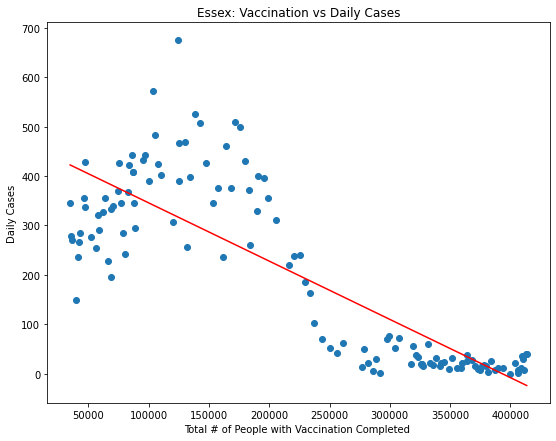

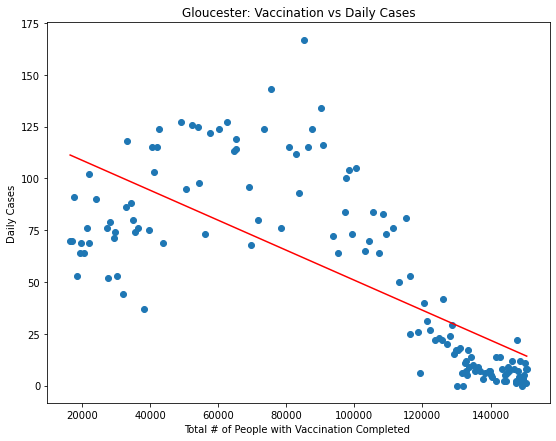

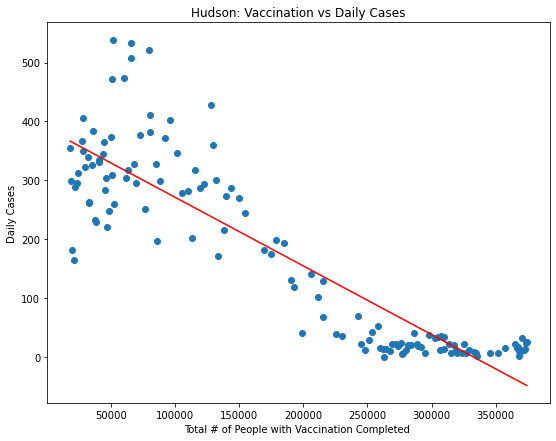

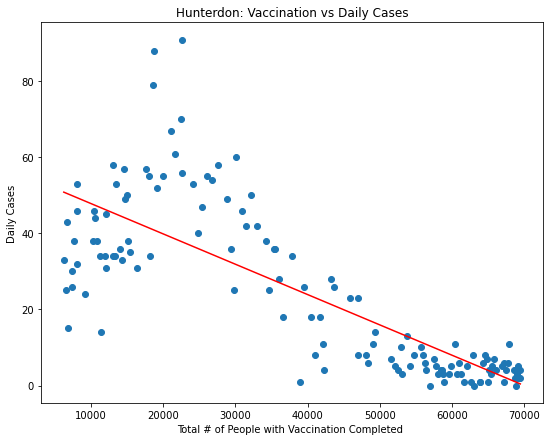

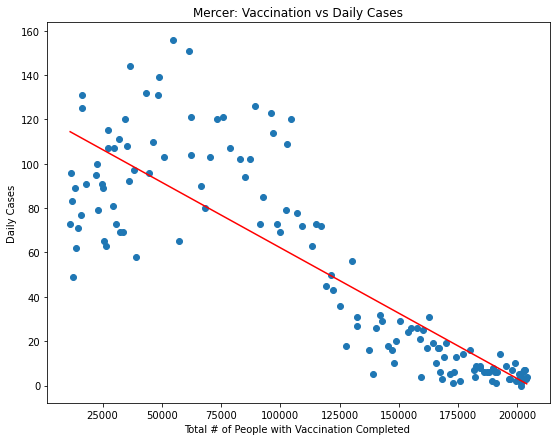

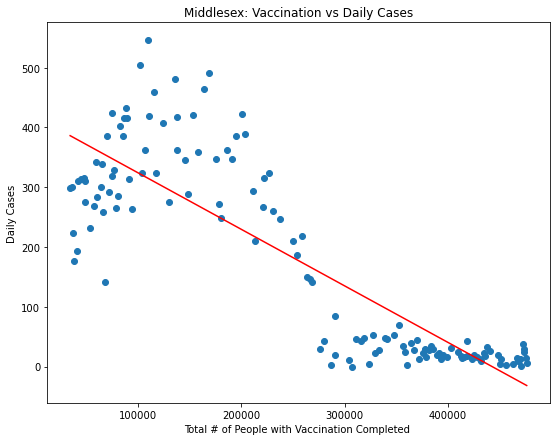

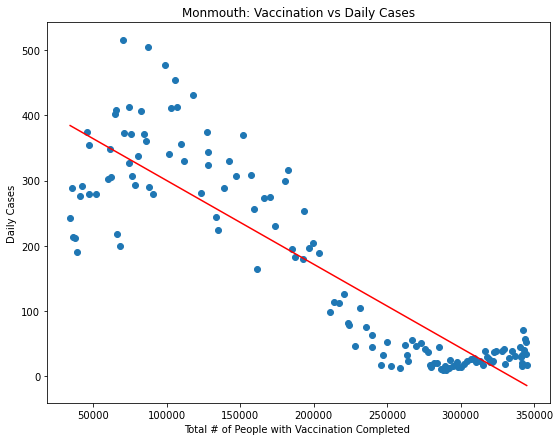

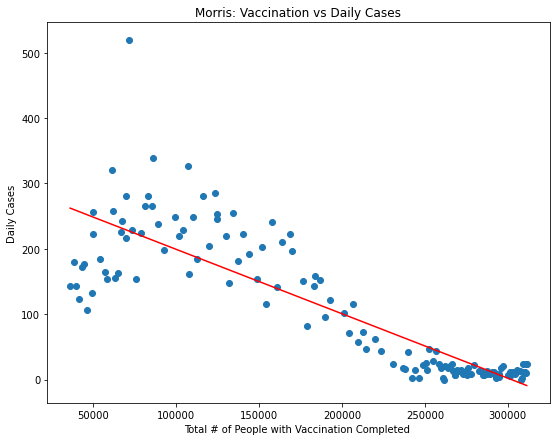

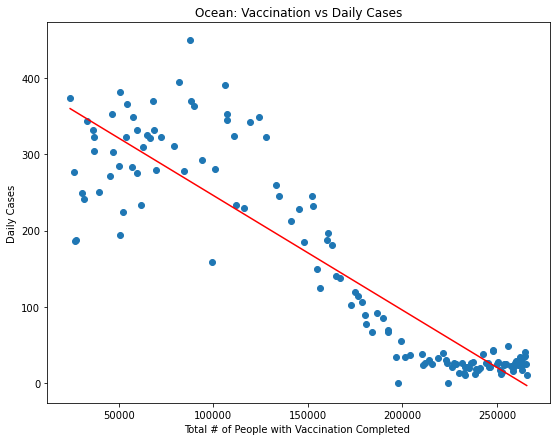

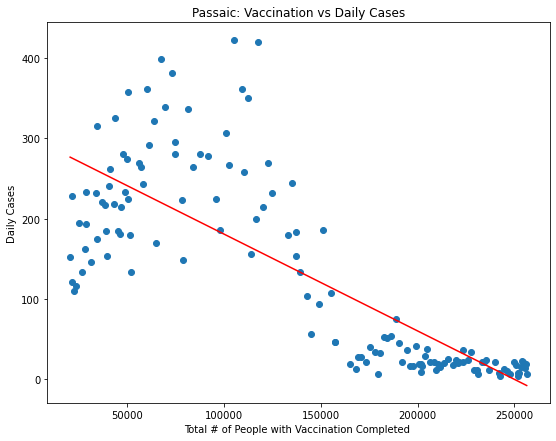

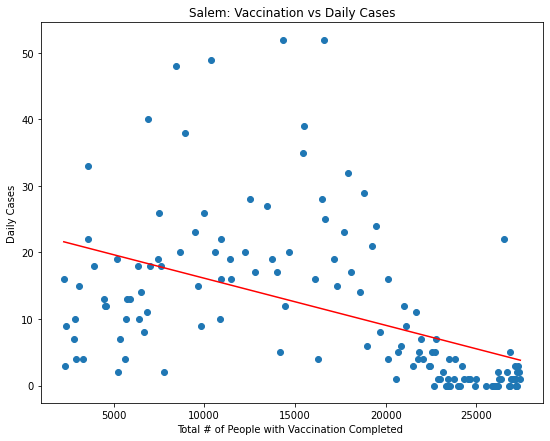

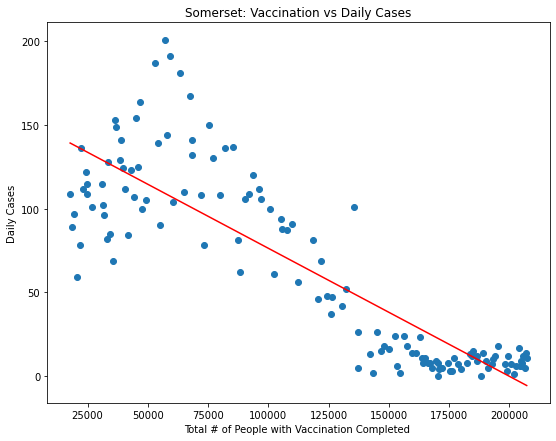

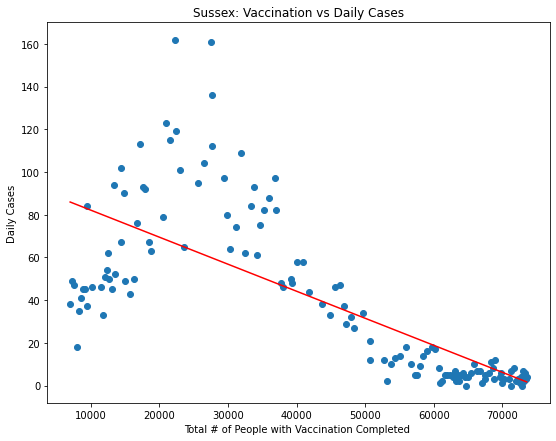

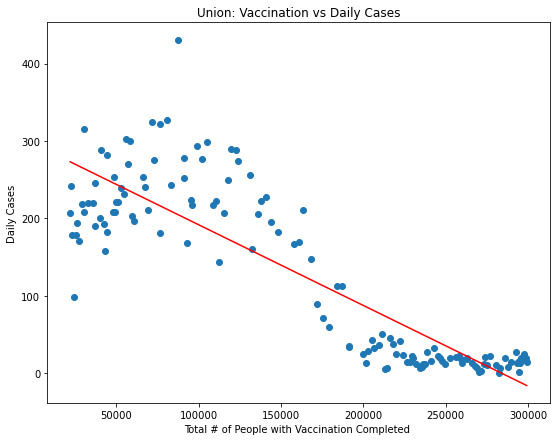

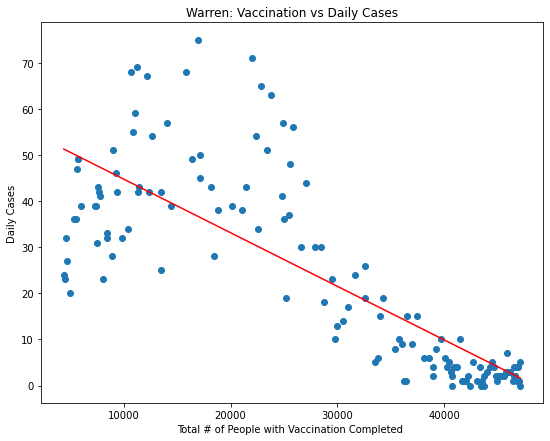

In [240]:
#Any County in NJ (from county_list) 
R_V = []
line_equation = []

for onecounty in county_list:
    print(onecounty)
    
    one_county = nc_vaccine_df.loc[nc_vaccine_df ['County'] == onecounty]

    #plot: setting x_values, y_values 
    x_values =one_county["Vaccination Completed"]
    y_values =  one_county["Daily Cases"]

    from scipy import stats
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values, creating line equation string
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    line_equation.append([line_eq])
    #print(line_eq)

    # Create Plot
    plt.figure(figsize=(9,7))
    x_values = one_county["Vaccination Completed"]
    y_values =  one_county["Daily Cases"]
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.title(onecounty + ": Vaccination vs Daily Cases")
    plt.ylabel("Daily Cases")
    plt.xlabel("Total # of People with Vaccination Completed ")

  
    
    print(f"The r-squared is: {rvalue**2}")
    R_V.append([rvalue**2])
    
    #plt.text(35000,14000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
    plt.savefig("../Images/Linear_regr_Vaccinaction_"+onecounty+".png")
    
Linear_Regression_Values =pd.DataFrame({'County':county_list,'R-squared': R_V, 'Line Equation': line_equation})    
Linear_Regression_Values

In [329]:
lin_regress_csv_data = Linear_Regression_Values.to_csv('LinRegress.csv', index = False)


### Age Groups and Vaccination

In [297]:
q_url="https://data.cdc.gov/resource/8xkx-amqh.json?recip_state=NJ&$select=date,fips,recip_county,series_complete_yes, series_complete_12plus,series_complete_18plus,series_complete_65plus,administered_dose1_recip,administered_dose1_recip_12plus,administered_dose1_recip_18plus,administered_dose1_recip_65plus"
q_url="https://data.cdc.gov/resource/8xkx-amqh.json?
response = requests.get(q_url).json()


Object `amqh.json` not found.


In [298]:
params = {
        "recip_state" :"NJ",
        "$select": "date,fips,recip_county,series_complete_yes,series_complete_12plus,series_complete_18plus,series_complete_65plus,administered_dose1_recip,administered_dose1_recip_12plus,administered_dose1_recip_18plus,administered_dose1_recip_65plus",
        "$limit": "20000"
        }
q_url="https://data.cdc.gov/resource/8xkx-amqh.json"
#q_url="https://data.cdc.gov/resource/8xkx-amqh.json?recip_state=NJ&$select=date,fips,recip_county,series_complete_yes, series_complete_12plus,series_complete_18plus,series_complete_65plus,administered_dose1_recip,administered_dose1_recip_12plus,administered_dose1_recip_18plus,administered_dose1_recip_65plus"
response = requests.get(q_url, params=params).json()

In [299]:
source_df = pd.DataFrame(response)
source_df['date_new']=source_df['date'].str.slice(0,10) 


In [300]:
age_clean_df =pd.DataFrame(source_df.dropna(subset=['series_complete_yes','series_complete_12plus','series_complete_18plus','series_complete_65plus','administered_dose1_recip',
                                        'administered_dose1_recip_12plus','administered_dose1_recip_18plus','administered_dose1_recip_65plus']))


group_age_clean_df =pd.DataFrame(age_clean_df.loc[age_clean_df['fips']!="UNK"])


In [301]:
group_age_clean_df["fips"] = group_age_clean_df["fips"].astype(int)
group_age_clean_df['series_complete_yes'] = group_age_clean_df['series_complete_yes'].astype(float)
group_age_clean_df['series_complete_12plus'] = group_age_clean_df['series_complete_12plus'].astype(float)
group_age_clean_df['series_complete_18plus'] = group_age_clean_df['series_complete_18plus'].astype(float)
group_age_clean_df['series_complete_65plus'] = group_age_clean_df['series_complete_65plus'].astype(float)
group_age_clean_df['administered_dose1_recip'] = group_age_clean_df['administered_dose1_recip'].astype(float)
group_age_clean_df['administered_dose1_recip_12plus'] = group_age_clean_df['administered_dose1_recip_12plus'].astype(float)
group_age_clean_df['administered_dose1_recip_18plus'] = group_age_clean_df['administered_dose1_recip_18plus'].astype(float)
group_age_clean_df['administered_dose1_recip_65plus'] = group_age_clean_df['administered_dose1_recip_65plus'].astype(float)



In [302]:
age_groups_mer_pd = group_age_clean_df.merge(population_df, how ="left", on ="fips")


In [303]:
percent_age_vaccine = pd.DataFrame(age_groups_mer_pd[["date_new","fips","recip_county"]])


In [304]:
percent_age_vaccine["Pct completed age 65+"]= age_groups_mer_pd["series_complete_65plus"]/age_groups_mer_pd["series_complete_yes"]*100
percent_age_vaccine["Pct completed age 18+"]= age_groups_mer_pd["series_complete_18plus"]/age_groups_mer_pd["series_complete_yes"]*100
percent_age_vaccine["Pct completed age 12+"]= age_groups_mer_pd["series_complete_12plus"]/age_groups_mer_pd["series_complete_yes"]*100
percent_age_vaccine["Pct completed age 18-65"]= percent_age_vaccine["Pct completed age 18+"]-percent_age_vaccine["Pct completed age 65+"]
percent_age_vaccine["Pct completed age 12-18"]= percent_age_vaccine["Pct completed age 12+"]-percent_age_vaccine["Pct completed age 18+"]
percent_age_vaccine["Pct completed age 0-12"]= 100 - percent_age_vaccine["Pct completed age 12+"]


In [305]:
Data_date = "2021-06-26"
pct_by_age_vaccine = percent_age_vaccine.loc[percent_age_vaccine["date_new"]==Data_date]#.sort_values(by=['Percentage completed'], ascending =False)
pct_by_age_vaccine_round= pct_by_age_vaccine.round(decimals=2)


In [306]:
merged_age_vaccine_df = pct_by_age_vaccine_round.merge(percent_vaccine_round, how='inner', on='fips')


In [307]:
age_group_by_vacc_df = merged_age_vaccine_df.rename(columns={'date_new':'Date','fips':'Fips','county':'County'})
#age_group_by_vacc_df                                                    
new_vacc_age_df=age_group_by_vacc_df[['Date','County','Percentage completed','Percentage initiated','Pct completed age 0-12','Pct completed age 12-18', 'Pct completed age 18-65','Pct completed age 65+']]
new_vacc_age_df.head()

,Date,County,Percentage completed,Percentage initiated,Pct completed age 0-12,Pct completed age 12-18,Pct completed age 18-65,Pct completed age 65+
0,2021-06-26,Ocean,42.41,47.23,0.0,1.73,57.95,40.32
1,2021-06-26,Salem,42.75,48.30,0.0,3.22,64.45,32.33
2,2021-06-26,Atlantic,49.65,56.01,0.0,2.97,68.02,29.00
3,2021-06-26,Mercer,53.14,61.42,0.0,5.44,72.21,22.35
4,2021-06-26,Sussex,50.52,55.93,0.0,3.10,69.08,27.82


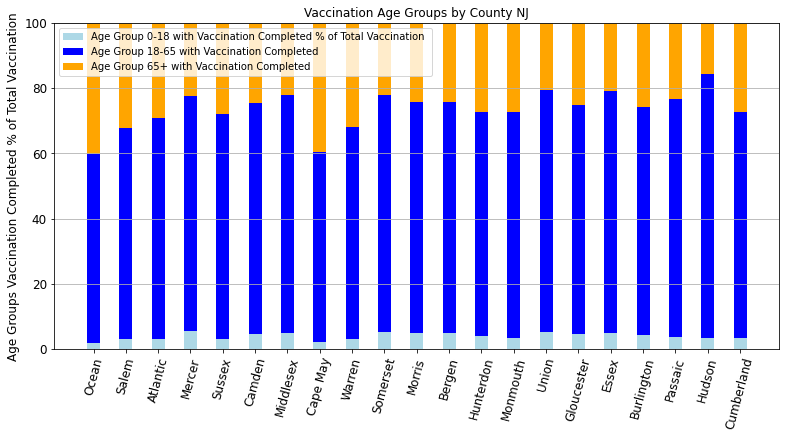

In [308]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
header = ['Age Group 0-18 with Vaccination Completed % of Total Vaccination ','Age Group 18-65 with Vaccination Completed',
          'Age Group 65+ with Vaccination Completed']
dataset = [new_vacc_age_df["Pct completed age 12-18"],new_vacc_age_df['Pct completed age 18-65'],
           new_vacc_age_df['Pct completed age 65+']]
X_AXIS = new_vacc_age_df["County"]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(13.0, 6.0)

configs = dataset[0]
N = len(configs)
ind = np.arange(N)
width = 0.4
 
p1 = plt.bar(ind, dataset[0], width, color='lightblue')
p2 = plt.bar(ind, np.array(dataset[1]), width, bottom=dataset[0], color='blue')
p3 = plt.bar(ind, np.array(dataset[2]), width, bottom=dataset[0]+dataset[1], color='orange')
           
plt.ylim([0,100])
plt.yticks(fontsize=12)
plt.ylabel("Age Groups Vaccination Completed % of Total Vaccination", fontsize=12)
plt.xticks(ind, X_AXIS, fontsize=12, rotation=75)
plt.title("Vaccination Age Groups by County NJ"   )
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=10)
plt.grid(axis = "y")
plt.savefig("../Images/Vaccination_Age_Groups_by_County.png")

plt.show()

In [350]:
# imported file from analysis AgeGroup  vs Cases 
#age_groups_df = pd.read_csv("Data/Age_Gender_cases_population.csv")


In [351]:
#age_absol_group_df=age_groups_df[['County','County_Num','under18_cases','18_to_49_cases','50_to_64_cases','65+_cases','Total_cases_by_age']]
#age_added_df =pd.DataFrame(age_absol_group_df[['County','County_Num']])
#age_added_df['Age18 and under cases']
#age_added_df['18_64_cases']=age_groups_df['18_to_49_cases']+age_groups_df['50_to_64_cases']
#age_added_df